In [1]:
import pandas as pd
import numpy as np
import networkx as nx

#Visualizations
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap

# from nxviz import CircosPlot # Needs to be installed

In [2]:
# using 2010 data for graphing, smallest data set to build the prototype for using NetworkX faster
year = 2011
station_csv = pd.read_csv("~/Projects/NiceRide/Nice_Ride_data/"+str(year)+"/NiceRide_station_"+str(year)+".csv")
ride_csv = pd.read_csv("~/Projects/NiceRide/Nice_Ride_data/"+str(year)+"/NiceRide_trip_history_"+str(year)+".csv")

In [3]:
station_df = pd.DataFrame(station_csv)
rides_df = pd.DataFrame(ride_csv)

In [4]:
#rides_df = rides_df[rides_df.End_id != 30157]
#rides_df = rides_df[rides_df.End_id != 30160]

In [5]:
# returns a dataframe with the total sum of duration from station start and station end
duration_sum = rides_df.groupby(by=['Start_id', 'End_id'],axis=0, as_index=False).sum()

In [6]:
# returns a dataframe with the total count of rides from station start and station end
ride_counts = rides_df.drop(['Start_date', 'Start_name', 'End_date', 'End_name', 'duration', 'account'], axis=1)
ride_counts['counts'] = 0
ride_counts = ride_counts.groupby(by=['Start_id', 'End_id'],axis=0, as_index=False)['counts'].count()

In [7]:
print([m for m in nx.__dir__() if 'pandas' in m])

graph = nx.from_pandas_edgelist(ride_counts,\
                                 source = 'Start_id', \
                                 target = 'End_id', \
                                 edge_attr = 'counts', \
                                 create_using = nx.Graph())

['from_pandas_adjacency', 'to_pandas_adjacency', 'from_pandas_edgelist', 'to_pandas_edgelist']


In [8]:
##### Part 1: simple network visualization ####
###################################################################################################
# extract country and then extra columns

def simple_visualization (station_df, rides_df):
    if (station_df is None) or (rides_df is None):
        print("Data cannot be retrieved and read")
    else:
        # returns a dataframe with the total count of rides from station start and station end
        ride_counts = rides_df.drop(['Start_date', 'Start_name', 'End_date', 'End_name', 'duration', 'account'], axis=1)
        ride_counts['counts'] = 0
        ride_counts = ride_counts.groupby(by=['Start_id', 'End_id'],axis=0, as_index=False)['counts'].count()

        # Counts of total rides from any station start point
        counts = ride_counts.groupby('Start_id', as_index=False).sum().drop('End_id', axis=1)
        
        # Station data, w/total rides merged in
        pos_data = station_df.merge(counts, left_on = 'Terminal', right_on='Start_id').drop(['Ndocks', 'Start_id'], axis=1)

    # Create graph
        graph = nx.from_pandas_edgelist(ride_counts,\
                                         source = 'Start_id', \
                                         target = 'End_id', \
                                         edge_attr = 'counts', \
                                         create_using = nx.Graph())

    # Set up base map
        plt.figure(figsize=(20,20))
        m = Basemap(
                projection='merc',
                llcrnrlon=-93.22,
                llcrnrlat=44.94,
                urcrnrlon=-93.31,
                urcrnrlat=45,
                lat_ts=0,
                resolution='l',
                suppress_ticks=True)

    # import long lat as m attribute
        mx, my = m(pos_data['Longitude'].values, pos_data['Latitude'].values)
        pos = {}
        for count, elem in enumerate (pos_data['Terminal']):
            pos[elem] = (mx[count], my[count])

    # draw nodes and edges and over aly on basemap
        
        nx.draw_networkx_nodes(G = graph, pos = pos, node_list = graph.nodes(), node_color = 'r', alpha = 0.8,
                               node_size = [(counts.counts.values * .33)])
        nx.draw_networkx_edges(G = graph, pos = pos, edge_color='g', width = (np.log(ride_counts['counts'].values) / 2), 
                               alpha=0.1, arrows = False)
        
        
        ''' 
        # draw nodes and edges and overly on basemap
        nx.draw_networkx_nodes(G = graph, pos = pos, 
                               nodelist = [x for x in graph.nodes() \
                                            if pos_data[pos_data.Terminal == x]['counts'] >= 2000],
                               node_color = 'r', alpha = 0.8,
                               node_size = [(counts.counts.values * .33)])

        nx.draw_networkx_labels(G = graph, pos = pos, font_size=10,
                                labels = {x:x for x in graph.nodes() \
                                          if pos_data[pos_data.Terminal == x]['counts'] >= 2000})

        nx.draw_networkx_nodes(G = graph, pos = pos, 
                               nodelist = [x for x in graph.nodes() \
                                            if pos_data[pos_data.Terminal == x]['counts'] < 2000],
                               node_color = 'b', alpha = 0.6,
                               node_size = [(counts.counts.values * .33)])

        nx.draw_networkx_edges(G = graph, pos = pos, edge_color = 'g', 
                               width = ride_counts['counts']*0.75, 
                               alpha=0.06, arrows = False)

        m.drawcountries(linewidth = 3)
        m.drawstates(linewidth = 0.2)
        m.drawcoastlines(linewidth=1)
        m.fillcontinents(alpha = 0.3)
        line1 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red")
        line2 = mlines.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="blue")
        line3 = mlines.Line2D(range(1), range(1), color="green", marker='',markerfacecolor="green")
        plt.legend((line1, line2, line3), ('Large Stations > 2000 rides', 'Smaller Stations', 'rides'),
                                           loc=4, fontsize = 'xx-large')
        plt.title("Network graph of NiceRides in MN", fontsize = 30)
        '''

        plt.tight_layout()
        plt.savefig("/home/grimoire/Projects/NiceRide/Visualizations/Networkx/"+str(year)+"_networkx.png")
        plt.show()
        

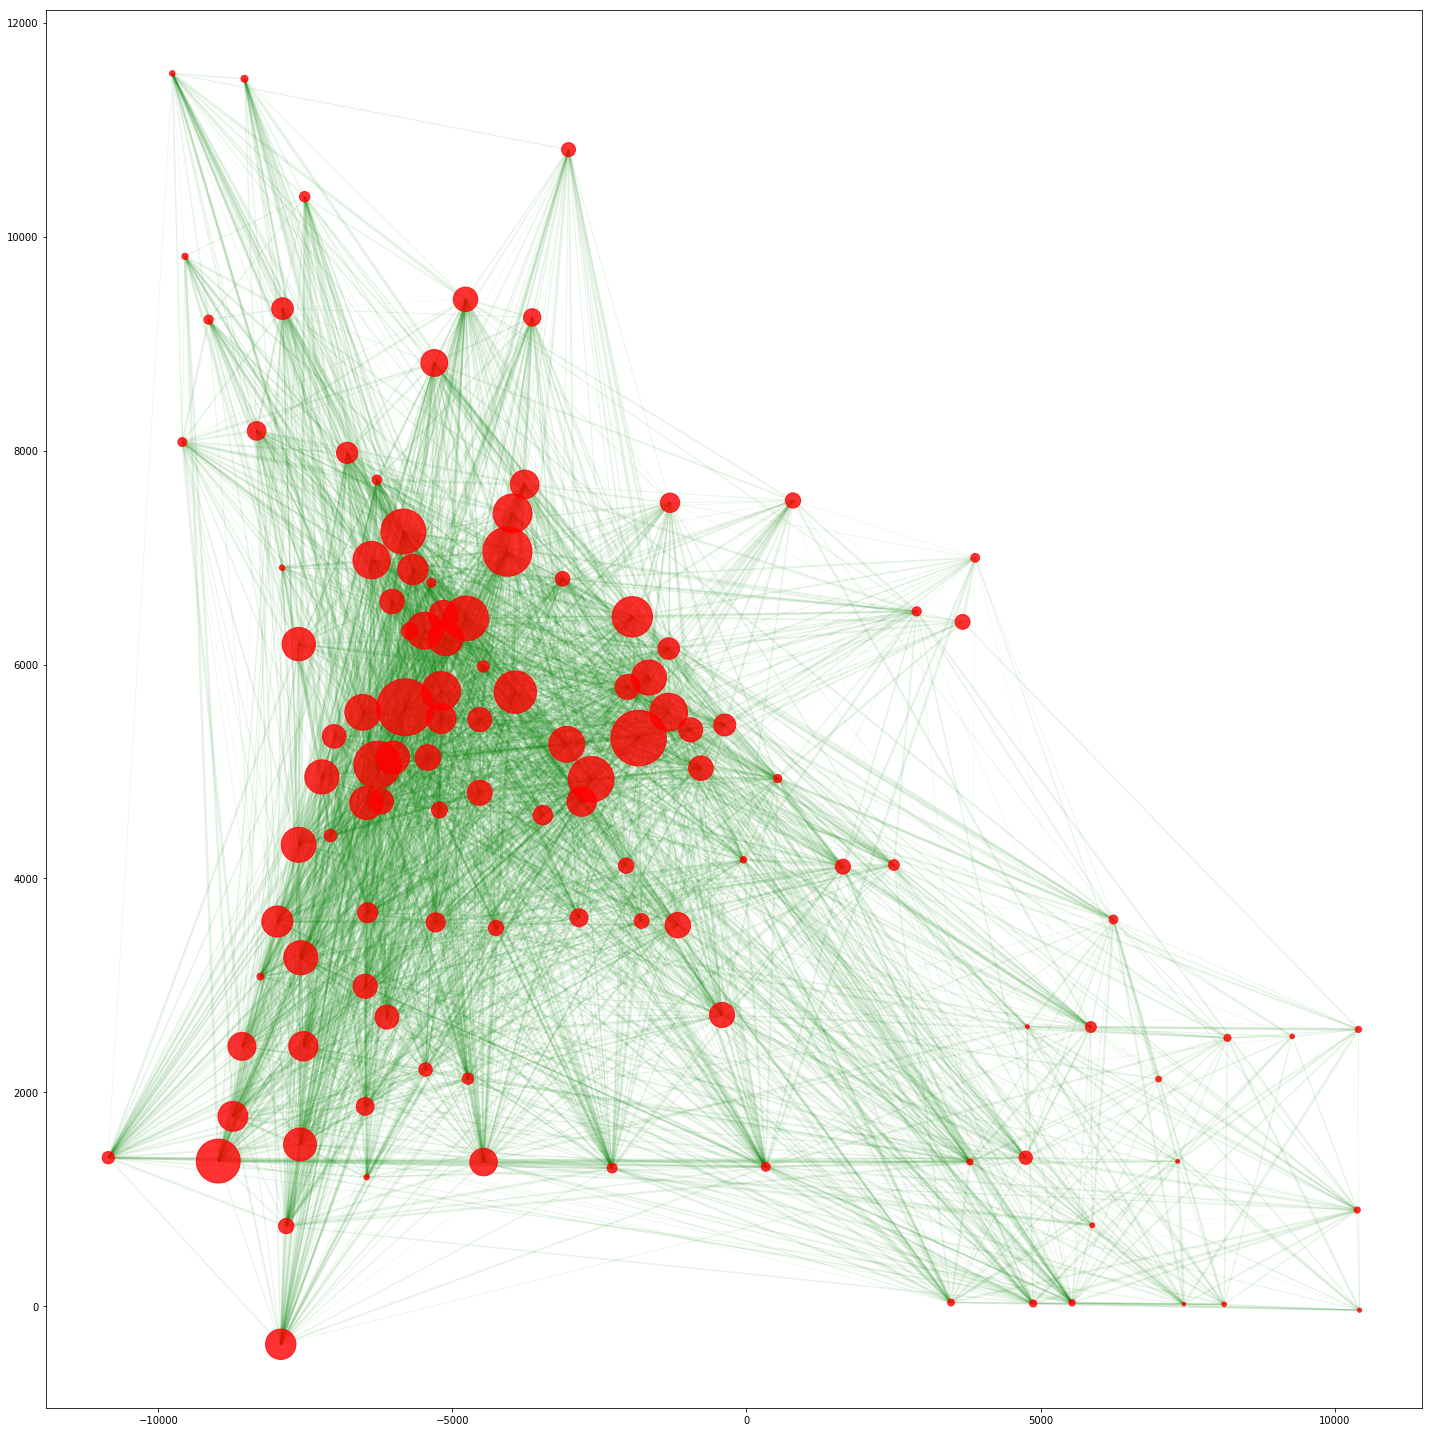

In [9]:
simple_visualization(station_df, rides_df)
# advanced_visualization(airport_df, routes_df)